Project: Image Classification and Regression
MVA - CentraleSupelec 

Sarah Bourial

The functions below are used to generate a disk, a rectangle and a triangle with an optional noise parameter. All 3 functions have the generate_a_drawing function embedded.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

Rectangle Figure:

In [6]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

Disk Figure:

In [7]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

Triangle Figure:

In [8]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

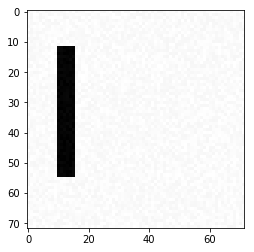

In [9]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

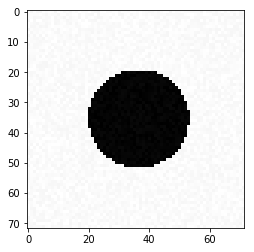

In [10]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

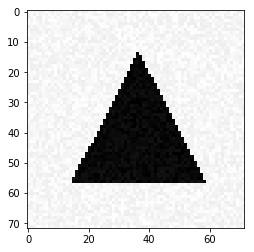

In [11]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

The following function randomly generate images datasets made of (either) triangles, rectangles or disks.

In [12]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

These last two functions are going to be used later in the rest of our project.

In [13]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [14]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [15]:
import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [16]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

I. Simple Classification

Build and train a linear classifier in Keras to classify a image (like one generated above) into one of the three possible categories (i.e. rectangle, disk, triangle).

Importing packages

In [1]:
import tensorflow as tf
import numpy as np
import keras

import keras.models
from keras.models import Sequential

from keras.layers import Activation, Dense

from keras import optimizers
from keras.optimizers import SGD, Adagrad, RMSprop, Adam

import keras.utils
from keras import utils as np_utils



/Users/Boubou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.1. Generate a training set of images of simple geometric shapes (rectangle, disk, triangle)
centered in the image

In [14]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train,3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


1.2. Linear Classifiers

The models used below are simple sequential model with 1 Dense layer and 1 Activation layer with ReLu and Softmax parameters. The Categorical Crossentropy function is used as a loss function.

1.2.1. Stochastic Gradient Descend Optimizer (SGD)

1.2.1.1. Using the Relu parameter

In [15]:
#Building our model
modelSGD = Sequential()
classes = 3

modelSGD.add(Dense(classes, input_dim=X_train.shape[1]))
modelSGD.add(Activation('relu'))

In [16]:
#Building the optimizer 
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9,nesterov=True)
modelSGD.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
#Training the model
modelSGD.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 0s 131us/step - loss: 6.6331 - acc: 0.3444 - val_loss: 5.8555 - val_acc: 0.1000
Epoch 2/100
270/270 [==============================] - 0s 111us/step - loss: 6.6320 - acc: 0.3444 - val_loss: 5.8527 - val_acc: 0.1000
Epoch 3/100
270/270 [==============================] - 0s 114us/step - loss: 6.6307 - acc: 0.3444 - val_loss: 5.8500 - val_acc: 0.1000
Epoch 4/100
270/270 [==============================] - 0s 126us/step - loss: 6.6296 - acc: 0.3444 - val_loss: 5.8473 - val_acc: 0.1000
Epoch 5/100
270/270 [==============================] - 0s 229us/step - loss: 6.6284 - acc: 0.3444 - val_loss: 5.8447 - val_acc: 0.1000
Epoch 6/100
270/270 [==============================] - 0s 149us/step - loss: 6.6273 - acc: 0.3444 - val_loss: 5.8421 - val_acc: 0.1000
Epoch 7/100
270/270 [==============================] - 0s 150us/step - loss: 6.6262 - acc: 0.3444 - val_loss: 5.8396 - val_acc: 0.1000
Epoch 8/10

1.2.1.2. Using Softmax Parameter

In [19]:
#Building our model
modelSGD1 = Sequential()
classes = 3

modelSGD1.add(Dense(classes, input_dim=X_train.shape[1]))
modelSGD1.add(Activation(tf.nn.softmax))

In [20]:
#Building the optimizer 
sgd = optimizers.SGD(lr=0.05,decay=1e-6, momentum=0.9,nesterov=True)
modelSGD1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Training the model
modelSGD1.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 0s 763us/step - loss: 7.8254 - acc: 0.3296 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 2/100
270/270 [==============================] - 0s 116us/step - loss: 11.2230 - acc: 0.3037 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 3/100
270/270 [==============================] - 0s 133us/step - loss: 11.2230 - acc: 0.3037 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 4/100
270/270 [==============================] - 0s 143us/step - loss: 11.2230 - acc: 0.3037 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 5/100
270/270 [==============================] - 0s 114us/step - loss: 11.2230 - acc: 0.3037 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 6/100
270/270 [==============================] - 0s 152us/step - loss: 11.2230 - acc: 0.3037 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 7/100
270/270 [==============================] - 0s 144us/step - loss: 11.2230 - acc: 0.3037 - val_loss: 5.3727 - val_acc: 0.6667
Epoc

1.2.2. Checking results on test sets using SGD Optimizer with Softmax Parameter

In [22]:
#On a disk shape
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])

prediction = modelSGD1.predict(X_test) #generate predicted Y
prediction

array([[1., 0., 0.]], dtype=float32)

In [23]:
#On a rectangle shape
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])

prediction = modelSGD1.predict(X_test) #generate predicted Y
prediction

array([[1., 0., 0.]], dtype=float32)

In [24]:
#On a triangle shape
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])

prediction = modelSGD1.predict(X_test) #generate predicted Y
prediction

array([[1., 0., 0.]], dtype=float32)

1.2.2. Adam Optimizer

In [25]:
#Building our model
modelAdam = Sequential()
nb_classes = 3

modelAdam.add(Dense(nb_classes, input_dim=X_train.shape[1]))
modelAdam.add(Activation(tf.nn.softmax))

In [26]:
#Building the optimizer 
modelAdam.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
#Training the model
modelAdam.fit(X_train, Y_train, batch_size=32, epochs=50, validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/50
270/270 [==============================] - 0s 906us/step - loss: 2.3057 - acc: 0.3778 - val_loss: 1.0837 - val_acc: 0.5000
Epoch 2/50
270/270 [==============================] - 0s 126us/step - loss: 1.0905 - acc: 0.5333 - val_loss: 0.5069 - val_acc: 0.7667
Epoch 3/50
270/270 [==============================] - 0s 124us/step - loss: 0.6336 - acc: 0.7630 - val_loss: 0.5085 - val_acc: 0.9000
Epoch 4/50
270/270 [==============================] - 0s 152us/step - loss: 0.4141 - acc: 0.8889 - val_loss: 0.4198 - val_acc: 0.9000
Epoch 5/50
270/270 [==============================] - 0s 142us/step - loss: 0.3491 - acc: 0.9259 - val_loss: 0.5192 - val_acc: 0.8667
Epoch 6/50
270/270 [==============================] - 0s 121us/step - loss: 0.3068 - acc: 0.9556 - val_loss: 0.6934 - val_acc: 0.6000
Epoch 7/50
270/270 [==============================] - 0s 141us/step - loss: 0.3039 - acc: 0.8926 - val_loss: 0.8321 - val_acc: 0.4333
Epoch 8/50
270/27

Checking results using Adam Optimizer

In [28]:
#On a disk shape
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])

prediction = modelAdam.predict(X_test) 
prediction

array([[0., 1., 0.]], dtype=float32)

In [29]:
#On a rectangle shape
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])

prediction = modelAdam.predict(X_test) #generate predicted Y
prediction

array([[1., 0., 0.]], dtype=float32)

In [30]:
#On a triangle shape
X_test,_ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])

prediction = modelAdam.predict(X_test) #generate predicted Y
prediction

array([[0., 0., 1.]], dtype=float32)

Comments:

Using the Relu parameter, none of the two optimizers seems to be able to get past a 0.1 and 0.4 accuracy score threshold, respectively for SGd and Adam optimizer. Switching to a Softmax parameter, it seems like only the Adam optimizers performs very well as it reaches an accuracy score of 1 at the 34th epoch. However, the SGD classifier seems to remain stuck at a local minima of 0.667 accuracy score. A potential solution here for SGD could be to shuffle the training set before each epoch. 

II. Visualization Weights of the Linear Classifiers

In [31]:
#Importing packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
%matplotlib inline

SGD

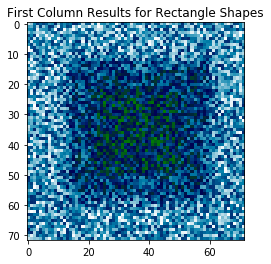

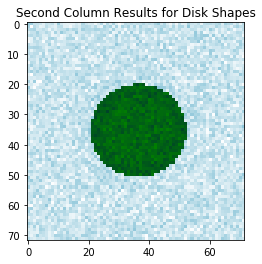

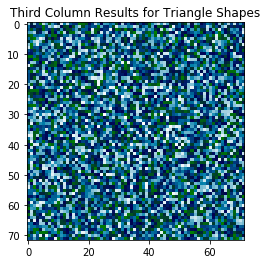

In [34]:
w = modelSGD.get_weights()

#Rectangle
plt.title('First Column Results for Rectangle Shapes')
plt.imshow(w[:,0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')
plt.show()


#Disk
plt.title('Second Column Results for Disk Shapes')
plt.imshow(w[:,1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')
plt.show()


#Triangle
plt.title('Third Column Results for Triangle Shapes')
plt.imshow(w[:,2].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')
plt.show()


These unprecise results (mainly for rectangle and triangle shapes) are unsurprisingly disappointing given our SGD classifier has failed to perform well on the training set. 

Adam Optimizer

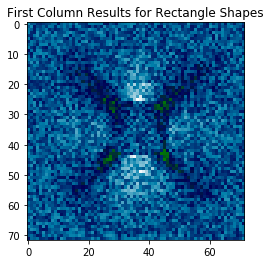

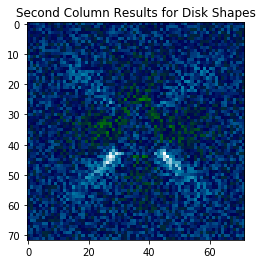

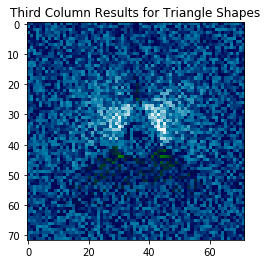

In [38]:
w = modelAdam.get_weights()[0]

#Rectangle
plt.title('First Column Results for Rectangle Shapes')
plt.imshow(w[:,0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')
plt.show()


#Disk
plt.title('Second Column Results for Disk Shapes')
plt.imshow(w[:,1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')
plt.show()


#Triangle
plt.title('Third Column Results for Triangle Shapes')
plt.imshow(w[:,2].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')
plt.show()

Comments

Visualising the 3 classes shows that the model identifies rectangle shapes by finding the shades around the corners. It recognizes triangle when these corners are not to be found at the top but present at the bottom; and similarly, it classifies shapes as disks when these corners are absent but there points where the shape touches the defined frame at the diameter. 

III. A more difficult classification problem

We retrain the same two linear classifiers as before on the new training set. Let us test their performance on the test set. 

In [39]:
#Generating dataset
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = np_utils.to_categorical(Y_train)

#Generating tests set
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


3.1. Evaluating SGD

In [40]:
#Defining the model
modelSGD = Sequential()
classes = 3

modelSGD.add(Dense(classes, input_dim=X_train.shape[1]))
modelSGD.add(Activation(tf.nn.softmax))

#Building the model
modelSGD.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

#Training the model
modelSGD.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 0s 1ms/step - loss: 8.0148 - acc: 0.3333 - val_loss: 8.9228 - val_acc: 0.1667
Epoch 2/100
270/270 [==============================] - 0s 168us/step - loss: 10.2840 - acc: 0.3333 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 3/100
270/270 [==============================] - 0s 131us/step - loss: 10.6260 - acc: 0.3407 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 4/100
270/270 [==============================] - 0s 121us/step - loss: 10.6260 - acc: 0.3407 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 5/100
270/270 [==============================] - 0s 102us/step - loss: 10.6260 - acc: 0.3407 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 6/100
270/270 [==============================] - 0s 119us/step - loss: 10.6260 - acc: 0.3407 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 7/100
270/270 [==============================] - 0s 128us/step - loss: 10.6260 - acc: 0.3407 - val_loss: 13.4317 - val_acc: 0.1667


In [41]:
#Evaluating SGD on this test set
"Loss : {}, Accuracy : {}".format(*modelSGD.evaluate(X_test, Y_test))

300/300 [==============================] - 0s 85us/step


'Loss : 10.637942924499512, Accuracy : 0.34000000009934106'

3.2. Evaluating Adam Optimizer

In [42]:
#Defining the model
modelAdam = Sequential()
classes = 3

modelAdam.add(Dense(classes, input_dim=X_train.shape[1]))
modelAdam.add(Activation(tf.nn.softmax))

#Building the model
modelAdam.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#Training the model
modelAdam.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/100
270/270 [==============================] - 0s 1ms/step - loss: 2.3343 - acc: 0.3444 - val_loss: 1.2683 - val_acc: 0.4667
Epoch 2/100
270/270 [==============================] - 0s 136us/step - loss: 1.4580 - acc: 0.3778 - val_loss: 1.6915 - val_acc: 0.2667
Epoch 3/100
270/270 [==============================] - 0s 158us/step - loss: 1.2355 - acc: 0.4407 - val_loss: 1.4467 - val_acc: 0.2667
Epoch 4/100
270/270 [==============================] - 0s 158us/step - loss: 1.1365 - acc: 0.4259 - val_loss: 0.9767 - val_acc: 0.5333
Epoch 5/100
270/270 [==============================] - 0s 140us/step - loss: 0.9545 - acc: 0.4593 - val_loss: 0.8097 - val_acc: 0.6333
Epoch 6/100
270/270 [==============================] - 0s 204us/step - loss: 0.9217 - acc: 0.5259 - val_loss: 0.8659 - val_acc: 0.5333
Epoch 7/100
270/270 [==============================] - 0s 154us/step - loss: 0.9560 - acc: 0.4852 - val_loss: 0.7865 - val_acc: 0.7333
Epoch 8/100


In [43]:
#Evaluating Adam Optimizer on this test set
"Loss : {}, Accuracy : {}".format(*modelAdam.evaluate(X_test, Y_test))

300/300 [==============================] - 0s 87us/step


'Loss : 0.9157685931523641, Accuracy : 0.5433333333333333'

Comments

The accuracy is lower than section 1 for both optimizers - 0.34 with SGD and 0.543 with Adam Optimizer, for the training data shapes are allowed to move within the image and change dimensions, thus calling for a more advanced classifier as we attempt below.

3.3. Training a Convolutional Deep Network

We here build a Convolutional Deep Network on the new dataset, using three pooling layers size options: (1,1); (2,2) and (3,3). Training size was also increased incremently, since I realized the more the better as much for accuracy increase as for overfitting reduction. 

In [52]:
#Importing packages
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [60]:
#Generating dataset
[X_train, Y_train] = generate_dataset_classification(800, 20, True)
Y_train = np_utils.to_categorical(Y_train)
X_train = X_train.reshape((-1,72,72,1))
classes=3
#Generating tests set
[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape((-1,72,72,1))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


3.3.1. 1 Pooling Layer

In [53]:
#Defining the model
modelCDN=Sequential()
modelCDN.add(Conv2D(16, kernel_size=(5,5), input_shape=(72,72,1,), activation='relu'))
modelCDN.add(MaxPooling2D(pool_size=(1,1)))
modelCDN.add(Flatten())
modelCDN.add(Dropout(0.3))
modelCDN.add(Dense(classes, activation= tf.nn.softmax))

In [55]:
#Building the model - We use the Adam Optimizer since it performs better than the SGD as shown above
modelCDN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelCDN.fit(X_train,Y_train,epochs=10, batch_size=32)

Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 6.4951 - acc: 0.3650
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 1.7383 - acc: 0.6013
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6909 - acc: 0.7413
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 0.5943 - acc: 0.7863
Epoch 5/10
800/800 [==============================] - 4s 6ms/step - loss: 0.5052 - acc: 0.8387
Epoch 6/10
800/800 [==============================] - 4s 6ms/step - loss: 0.4287 - acc: 0.8562
Epoch 7/10
800/800 [==============================] - 4s 6ms/step - loss: 0.3735 - acc: 0.8912
Epoch 8/10
800/800 [==============================] - 5s 6ms/step - loss: 0.3367 - acc: 0.9062
Epoch 9/10
800/800 [==============================] - 5s 6ms/step - loss: 0.3089 - acc: 0.9200
Epoch 10/10
800/800 [==============================] - 5s 7ms/step - loss: 0.2589 - acc: 0.9475


In [61]:
#Evaluating the model
evaluation = modelCDN.evaluate(X_test, Y_test)
"Loss : {}, Accuracy : {}".format(*evaluation)

300/300 [==============================] - 1s 3ms/step


'Loss : 0.7442662445704142, Accuracy : 0.7199999992052714'

3.3.2. 2 Pooling Layers

In [64]:
#Defining the model
modelCDN2 = Sequential()
modelCDN2.add(Conv2D(16, kernel_size=(5,5), input_shape=(72,72,1), activation='relu'))
modelCDN2.add(MaxPooling2D(pool_size=(2,2)))
modelCDN2.add(Flatten())
modelCDN2.add(Dropout(0.3))
modelCDN2.add(Dense(classes, activation= tf.nn.softmax))

In [67]:
#Building the model
modelCDN2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelCDN2.fit(X_train,Y_train,epochs=10, batch_size=32)

Epoch 1/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0116 - acc: 1.0000
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0065 - acc: 1.0000
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0078 - acc: 1.0000
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0051 - acc: 1.0000
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0058 - acc: 0.9988
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0050 - acc: 1.0000
Epoch 7/10
800/800 [==============================] - 4s 4ms/step - loss: 0.0035 - acc: 1.0000
Epoch 8/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0030 - acc: 1.0000
Epoch 9/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0027 - acc: 1.0000
Epoch 10/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0040 - acc: 1.0000


In [68]:
#Evaluating the model
evaluation = modelCDN2.evaluate(X_test, Y_test)
"Loss : {}, Accuracy : {}".format(*evaluation)

300/300 [==============================] - 1s 3ms/step


'Loss : 0.31294408003489177, Accuracy : 0.8999999992052714'

3.3.3. 3 Pooling Layers

In [69]:
#Defining the model
modelCDN3 = Sequential()
modelCDN3.add(Conv2D(16, kernel_size=(5,5), input_shape=(72,72,1), activation='relu'))
modelCDN3.add(MaxPooling2D(pool_size=(3,3)))
modelCDN3.add(Flatten())
modelCDN3.add(Dropout(0.3))
modelCDN3.add(Dense(classes, activation= tf.nn.softmax))

In [70]:
#Building the model
modelCDN3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelCDN3.fit(X_train,Y_train,epochs=10, batch_size=32)

Epoch 1/10
800/800 [==============================] - 4s 5ms/step - loss: 1.0695 - acc: 0.4450
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.8739 - acc: 0.6663
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.7865 - acc: 0.6750
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.6949 - acc: 0.7600
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.6569 - acc: 0.7475
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5964 - acc: 0.7937
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5791 - acc: 0.7900
Epoch 8/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5545 - acc: 0.8050
Epoch 9/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5250 - acc: 0.8250
Epoch 10/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5061 - acc: 0.8212


In [71]:
#Evaluating the model
evaluation = modelCDN3.evaluate(X_test, Y_test)
"Loss : {}, Accuracy : {}".format(*evaluation)

300/300 [==============================] - 1s 3ms/step


'Loss : 0.6102469436327617, Accuracy : 0.7399999992052714'

We can clearly see how this model not only fits the data much better, but also how increasing the pool size has lead to a much faster and much more accurate prediciton for pool size (2,2) - from 0.71 accuracy to 0.89; yet too much increase has a downfall e.g. pool size (3,3) made the accuracy drop back to 0.73.

IV. Regression Problem

Let us now run a regression to predict the image locations of the vertices of a triangle, given an image of this triangle.

4.1. Generating and visualising the data

In [76]:
#Generating training set
[X_train, Y_train] = generate_dataset_regression(800, 20)

#Generating test set
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


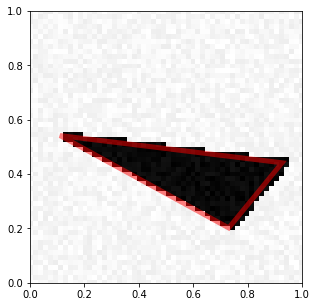

In [77]:
visualize_prediction(X_train[0], Y_train[0])

4.2. Regression

In [78]:
#Normalising Y_train and Y_test, using the Sklearn library
from sklearn import preprocessing
y_train= preprocessing.normalize(Y_train)
y_test = preprocessing.normalize(Y_test)

In [79]:
#Building Simple Linear Regression Model
modelreg = Sequential()
modelreg.add(Dense(6,input_shape=(X_train.shape[1],)))

In [80]:
#Running the model
modelreg.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
modelreg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Train on 800 samples, validate on 300 samples
Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 2.4461 - acc: 0.1975 - val_loss: 0.7293 - val_acc: 0.1867
Epoch 2/50
800/800 [==============================] - 0s 193us/step - loss: 0.2527 - acc: 0.1675 - val_loss: 0.1130 - val_acc: 0.1833
Epoch 3/50
800/800 [==============================] - 0s 182us/step - loss: 0.1039 - acc: 0.1988 - val_loss: 0.0774 - val_acc: 0.2033
Epoch 4/50
800/800 [==============================] - 0s 186us/step - loss: 0.0864 - acc: 0.1875 - val_loss: 0.0855 - val_acc: 0.2100
Epoch 5/50
800/800 [==============================] - 0s 178us/step - loss: 0.0743 - acc: 0.1875 - val_loss: 0.0745 - val_acc: 0.1533
Epoch 6/50
800/800 [==============================] - 0s 175us/step - loss: 0.0692 - acc: 0.2025 - val_loss: 0.0732 - val_acc: 0.2067
Epoch 7/50
800/800 [==============================] - 0s 174us/step - loss: 0.0706 - acc: 0.2025 - val_loss: 0.0644 - val_acc: 0.2133
Epoch 8/50
800/800

In [81]:
#Evaluating the model
modelreg.evaluate(X_test, y_test)

300/300 [==============================] - 0s 99us/step


[0.07669607510169348, 0.20666666686534882]

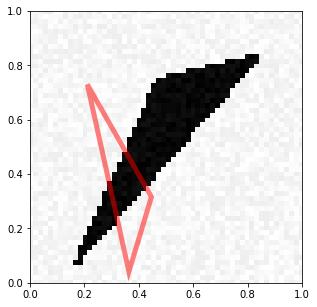

In [82]:
#Visualising results
y_predreg = modelreg.predict(X_test)
visualize_prediction(X_test[100], y_predreg[100])

As one can see, this simple linear regression model performs poorly on our dataset with only 20% accuracy and a visualy wrong pattern.

4.3. Trying out a more advanced regression model

In [83]:
#Reshaping data
X_train = X_train.reshape((-1, 72, 72, 1))
X_test = X_test.reshape((-1, 72, 72, 1))

In [124]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Reshape, BatchNormalization

#Building the model
modelreg1 =Sequential()

modelreg1.add(Conv2D(16, (3, 3), activation='relu'))
modelreg1.add(MaxPooling2D(pool_size=(2, 2)))
modelreg1.add(Conv2D(32, (5, 5), activation='relu'))
modelreg1.add(MaxPooling2D(pool_size=(2, 2)))
modelreg1.add(Conv2D(100, (5, 5), activation='relu'))
modelreg1.add(MaxPooling2D(pool_size=(2, 2)))
modelreg1.add(Flatten())
modelreg1.add(Dense(100, activation='relu'))
modelreg1.add(Dense(100, activation='relu'))
modelreg1.add(Dense(100, activation='relu')) 

modelreg1.add(Dense(6, activation='linear'))

In [126]:
#Running the model
modelreg1.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
modelreg1.fit((X_train),y_train,validation_split=0.2, epochs=50, batch_size=32)

Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 12s 18ms/step - loss: 0.0499 - acc: 0.1719 - val_loss: 0.0390 - val_acc: 0.1938
Epoch 2/50
640/640 [==============================] - 11s 17ms/step - loss: 0.0371 - acc: 0.2203 - val_loss: 0.0360 - val_acc: 0.2313
Epoch 3/50
640/640 [==============================] - 11s 17ms/step - loss: 0.0341 - acc: 0.2641 - val_loss: 0.0350 - val_acc: 0.2500
Epoch 4/50
640/640 [==============================] - 11s 17ms/step - loss: 0.0333 - acc: 0.2422 - val_loss: 0.0328 - val_acc: 0.3000
Epoch 5/50
640/640 [==============================] - 11s 17ms/step - loss: 0.0318 - acc: 0.2625 - val_loss: 0.0330 - val_acc: 0.2562
Epoch 6/50
640/640 [==============================] - 11s 17ms/step - loss: 0.0311 - acc: 0.2703 - val_loss: 0.0331 - val_acc: 0.2938
Epoch 7/50
640/640 [==============================] - 12s 18ms/step - loss: 0.0305 - acc: 0.2984 - val_loss: 0.0326 - val_acc: 0.3187
Epoch 8/50
640/6

In [127]:
#Evaluating the model
modelreg1.evaluate(X_test, y_test)

300/300 [==============================] - 1s 4ms/step


[0.04973345731695493, 0.2733333337306976]

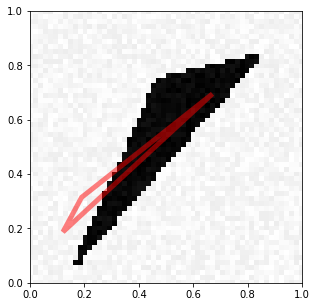

In [128]:
#Visualising results
y_pred_reg1 = modelreg1.predict(X_test)
visualize_prediction(X_test[100], y_pred_reg1[100])

Our model accuracy is slightly better (up 7%) but not enough to have the predictions lie close to the original shape.

V. Image Denoising

Implement an hourglass network for denoising: training the network to predict a noise-free image given a noisy
image as input.

First we alter the initial functions above to generate noisy drawings (noise generated randomly

In [17]:
#New functions to generate noisy and denoised data
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise, imdata

def generate_dataset_noise(nb_samples, free_location=False):
    # Getting im_size:
    noise = np.random.randint(0,100)  
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,2,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle_noise(free_location)
        elif category == 1: 
            X[i] = generate_a_disk_noise(free_location)
        else:
            [X[i], V] = generate_a_triangle_noise(free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_a_triangle_noise(free_location=False):
    noise = np.random.randint(0,100) #generate noise value randomly
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_noise(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_a_rectangle_noise(free_location=False):
    noise = np.random.randint(0,100) #generate noise value randomly
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise)

  

def generate_a_disk_noise(free_location=False):
    noise = np.random.randint(0,100)  #generate noise value randomly
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise)

In [18]:
#New function to generate test set
def generate_test_set_noise():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_noise(300)
    return [X_test, Y_test]

In [19]:
#Generate Training data
dataset,cat = generate_dataset_noise(800)
X_train = dataset[:,0]
Y_train = dataset[:,1]

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790


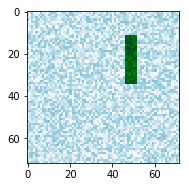

In [20]:
#Plot input noisy rectangle as an example
im = generate_a_rectangle_noise(True)
plt.subplot(1,2,2)
plt.imshow(im[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='ocean')

In [21]:
#Generate Test data
X_test_n, Y_test_n = generate_test_set_noise()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


We build a Convolutional Deep Network

In [22]:
from keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

In [23]:
#Reshape data set
X_train_n = X_train.reshape(800,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train_n= Y_train.reshape(800,IMAGE_SIZE,IMAGE_SIZE,1)

In [24]:
#Defining Model
modeln = Sequential()

#Input layers
modeln.add(Convolution2D(32,(3,3), activation='relu',padding = 'same'))
modeln.add(MaxPooling2D(pool_size=(2, 2)))
modeln.add(Convolution2D(32,(3,3), activation = 'relu', padding = 'same'))
modeln.add(MaxPooling2D(pool_size=(2,2)))

modeln.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', padding = 'same'))
modeln.add(UpSampling2D(size=(2, 2)))
modeln.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', padding = 'same'))
modeln.add(UpSampling2D(size=(2, 2)))
#Output layer
modeln.add(Convolution2D(1, kernel_size=(3, 3), activation='sigmoid', padding = 'same',input_shape=(72,72,1)))

In [25]:
#Buidling and training the model
modeln.compile(optimizer="adam", loss='binary_crossentropy')
modeln.fit(X_train_n, Y_train_n, epochs=25, batch_size=32, validation_split=0.1, shuffle=True, verbose=1)

Train on 720 samples, validate on 80 samples
Epoch 1/25
720/720 [==============================] - 19s 27ms/step - loss: 0.6420 - val_loss: 0.5656
Epoch 2/25
720/720 [==============================] - 24s 34ms/step - loss: 0.5173 - val_loss: 0.4886
Epoch 3/25
720/720 [==============================] - 30s 41ms/step - loss: 0.4829 - val_loss: 0.4796
Epoch 4/25
720/720 [==============================] - 28s 39ms/step - loss: 0.4789 - val_loss: 0.4772
Epoch 5/25
720/720 [==============================] - 27s 38ms/step - loss: 0.4770 - val_loss: 0.4763
Epoch 6/25
720/720 [==============================] - 28s 39ms/step - loss: 0.4767 - val_loss: 0.4755
Epoch 7/25
720/720 [==============================] - 39s 54ms/step - loss: 0.4756 - val_loss: 0.4750
Epoch 8/25
720/720 [==============================] - 41s 57ms/step - loss: 0.4750 - val_loss: 0.4748
Epoch 9/25
720/720 [==============================] - 30s 42ms/step - loss: 0.4749 - val_loss: 0.4739
Epoch 10/25
720/720 [================

In [ ]:
#Making our prediction on test set
prediction_n = modeln.predict(X_test_n)

Plotting results

Text(0.5,1,'Original Test Noisy Image')

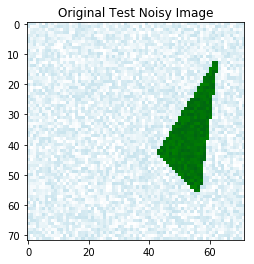

In [163]:
plt.imshow(X_test_n[150].reshape(72,72), cmap='ocean')
plt.title('Original Test Noisy Image')

Text(0.5,1,'Resulting Denoised Image')

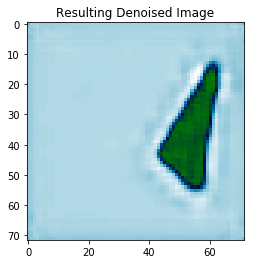

In [164]:
plt.imshow(prediction_n[150].reshape(72,72), cmap='ocean')
plt.title('Resulting Denoised Image')